# ***Detecting Fake News Using NLP***


# **Title:**

Detecting Fake News Using Natural Language Processing (NLP)

**Input and Output:**

**Input:** News articles containing title, author, and text.

**Output:** Classification of news articles as either Real (0) or Fake (1).

# **Dataset Details**


1.   id: unique id for a news article
2.   title: the title of a news article
3.   author: author of the news article
4.   text: the text of the article; could be incomplete
5.   label: a label that marks whether the news article is real or fake:
            1: Fake news
            0: real News

# **Dataset Summary:**

Total Samples: (20800)

Features: 5 (id, title, author, text, label)

Average Document Length: (10)

Classification Type: Binary Classification (Real/Fake)










# **Literature Review & Methodology:**

To understand the problem and choose an appropriate method, three research papers were analyzed:

[Paper 1](https://www.researchgate.net/publication/372374145_Fake_News_Detection_Using_a_Logistic_Regression_Model_and_Natural_Language_Processing_Techniques)

Problem: Identifying fake news using NLP techniques.

Methodology: TF-IDF with Logistic Regression.

Key Findings: TF-IDF performed well for feature extraction, and Logistic Regression provided high accuracy.


**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Data/fake-news')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Data/fake-news


In [ ]:
df=pd.read_csv('train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df.shape

(20800, 5)

In [ ]:
# counting the number of missing values in the dataset
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
# replacing the null values with empty string
df= df.fillna('')

In [ ]:
# merging the author name and news title
df['content'] = df['author']+' '+df['title']

In [ ]:
df['content']

,content
0,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,Consortiumnews.com Why the Truth Might Get You...
3,Jessica Purkiss 15 Civilians Killed In Single ...
4,Howard Portnoy Iranian woman jailed for fictio...
...,...
20795,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,Michael J. de la Merced and Rachel Abrams Macy...
20798,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [ ]:
# separating the data & label
X = df.drop(columns='label', axis=1)
Y = df['label']

In [ ]:
# Printing Features and Label
print("features:",X)
print("Label:",Y)

features:           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                            

**Stemming:**

**Stemming is the process of reducing a word to its Root word**


In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
df['content'] = df['content'].apply(stemming)

In [ ]:
df['content']

,content
0,darrel lucu hous dem aid even see comey letter...
1,daniel j flynn flynn hillari clinton big woman...
2,consortiumnew com truth might get fire
3,jessica purkiss civilian kill singl us airstri...
4,howard portnoy iranian woman jail fiction unpu...
...,...
20795,jerom hudson rapper trump poster child white s...
20796,benjamin hoffman n f l playoff schedul matchup...
20797,michael j de la merc rachel abram maci said re...
20798,alex ansari nato russia hold parallel exercis ...


In [ ]:
#separating the data and label
X = df['content'].values
Y = df['label'].values

In [ ]:
print(X)
print(Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (20797, 8364)	0.22322585870464115
  (20797, 8988)	0.36160868928090795
  (20797, 9518)	0.29542040034203126
  (20797, 9588)	0.17455348

In [ ]:
# Calculate the average number of words per document
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
average_words_per_document = df['word_count'].mean()

print(f'Average number of words : {average_words_per_document:.2f}')


**Splitting the dataset to training & test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

**Training the Model: Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

# Evaluation

**accuracy score**

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9863581730769231


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


**Making a Predictive System**

In [ ]:
X_new = X_test[2]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
print(Y_test[3])

0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute Precision, Recall, and F1-score
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

# Print the results
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-Score: {f1 * 100:.2f}%')


Precision: 96.59%
Recall: 99.33%
F1-Score: 97.94%


# **Data visualization**

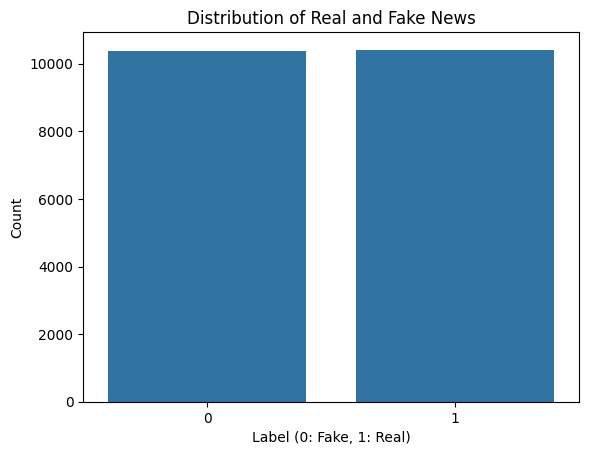

In [ ]:
# Plotting the distribution of labels
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='label', data=df)
plt.title('Distribution of Real and Fake News')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Count')
plt.show()

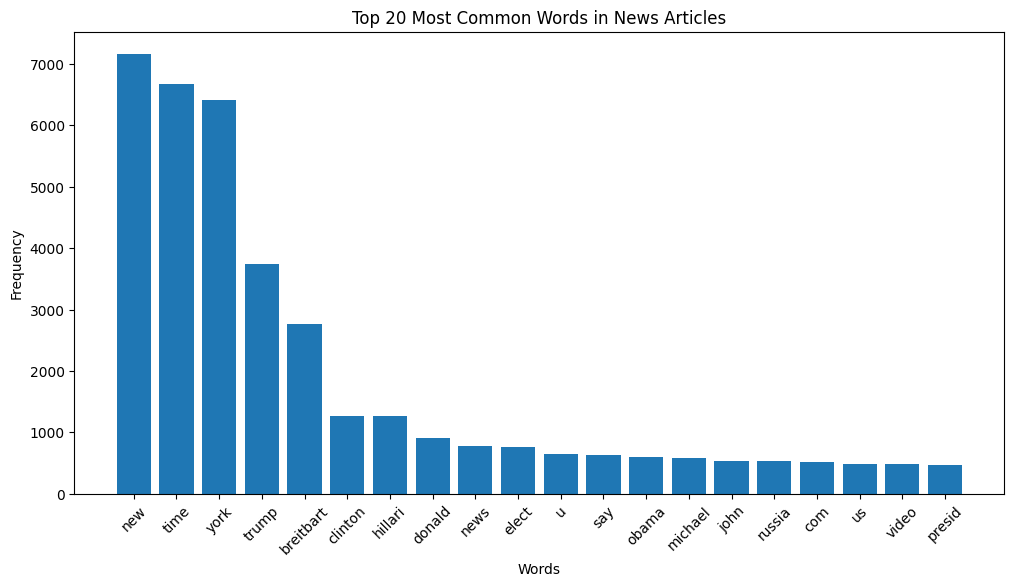

In [ ]:
from collections import Counter

# Counting the most common words after stemming
all_words = ' '.join(df['content']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plotting the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in News Articles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


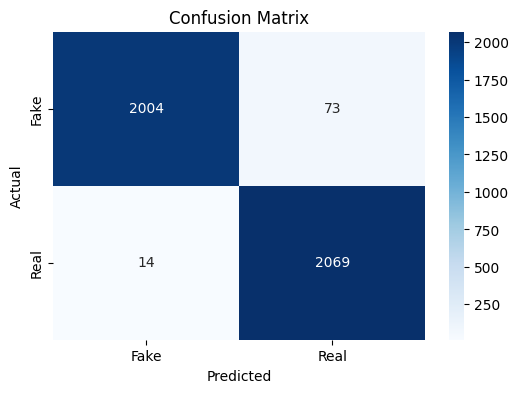

In [ ]:
from sklearn.metrics import confusion_matrix
# confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Future Plan:***

**Improve Preprocessing:**

Implement lemmatization instead of stemming for better accuracy.

**Experiment with Advanced Models:**

Try deep learning models like LSTM and BERT.

Compare performance with TF-IDF and Logistic Regression.

**Enhance Feature Engineering:**

Incorporate additional metadata features (e.g., publication date, source credibility).

**Hyperparameter Tuning:**

Optimize Logistic Regression parameters using GridSearchCV.